# Library

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import save_model
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
import json

# Exploratory Data Analysis (EDA)

## Input Data

In [75]:
data = pd.read_csv('data_tanaman.csv')
data.head() # head of data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,beras
1,85,58,41,21.770462,80.319644,7.038096,226.655537,beras
2,60,55,44,23.004459,82.320763,7.840207,263.964248,beras
3,74,35,40,26.491096,80.158363,6.980401,242.864034,beras
4,78,42,42,20.130175,81.604873,7.628473,262.717340,beras


In [76]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


## Data Summary

In [77]:
print(data.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


## Data Visualization

### Histogram

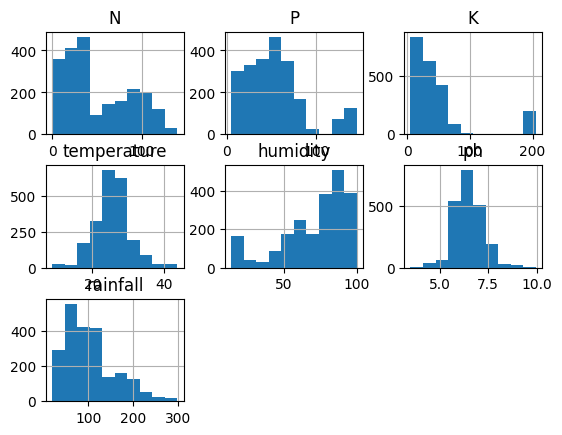

In [78]:
data.hist()
plt.show()

### Correlation Plot

In [ ]:
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

### Boxplot

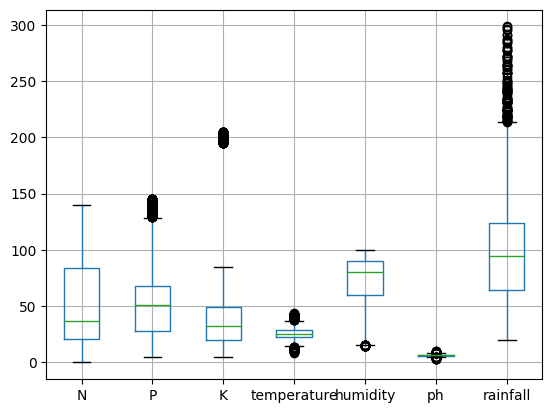

In [ ]:
# Boxplot of each features
data.boxplot()
plt.show()

<Axes: xlabel='rainfall', ylabel='label'>

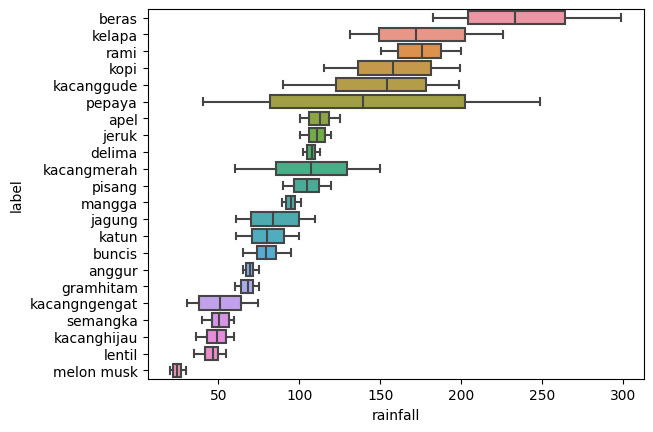

In [ ]:
# Boxplot of Y based on rainfall
mean_by_label = data.groupby(['label'])['rainfall'].mean().sort_values(ascending=False)
sns.boxplot(data=data, y="label", x="rainfall",order=mean_by_label.index)

<Axes: xlabel='temperature', ylabel='label'>

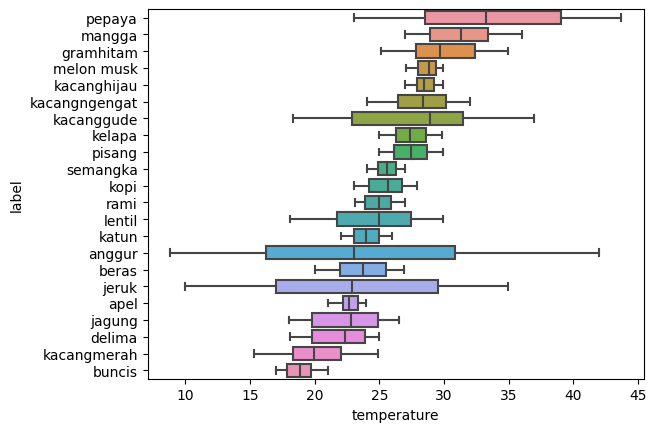

In [ ]:
# Boxplot of Y based on temperature
mean_by_label = data.groupby(['label'])['temperature'].mean().sort_values(ascending=False)
sns.boxplot(data=data, y="label", x="temperature",order=mean_by_label.index)

In [ ]:
# Boxplot of Y based on humidity
mean_by_label = data.groupby(['label'])['humidity'].mean().sort_values(ascending=False)
sns.boxplot(data=data, y="label", x="humidity",order=mean_by_label.index)

In [ ]:
# Boxplot of Y based on PH
mean_by_label = data.groupby(['label'])['ph'].mean().sort_values(ascending=False)
sns.boxplot(data=data, y="label", x="ph",order=mean_by_label.index)

In [ ]:
# Boxplot of Y based on N
mean_by_label = data.groupby(['label'])['N'].mean().sort_values(ascending=False)
sns.boxplot(data=data, y="label", x="N",order=mean_by_label.index)

In [ ]:
# Boxplot of Y based on P
mean_by_label = data.groupby(['label'])['P'].mean().sort_values(ascending=False)
sns.boxplot(data=data, y="label", x="P",order=mean_by_label.index)

In [ ]:
# Boxplot of Y based on K
mean_by_label = data.groupby(['label'])['K'].mean().sort_values(ascending=False)
sns.boxplot(data=data, y="label", x="K",order=mean_by_label.index)

# Pre-Processing Data

In [ ]:
classes = data['label'].unique()
classes # data classes

array(['beras', 'jagung', 'buncis', 'kacangmerah', 'kacanggude',
       'kacangngengat', 'kacanghijau', 'gramhitam', 'lentil', 'delima',
       'pisang', 'mangga', 'anggur', 'semangka', 'melon musk', 'apel',
       'jeruk', 'pepaya', 'kelapa', 'katun', 'rami', 'kopi'], dtype=object)

In [ ]:
numClasses = len(classes)
numClasses # number of classes

22

## Encoding

In [ ]:
#Reading the input
features = data.drop(columns = ['label'])
features

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [79]:
# One Hot Encoded Target
labelEncoder = LabelEncoder()
labelEncoder.fit(data["label"])
labelEncoder_key_value=dict(zip(labelEncoder.classes_,labelEncoder.transform(labelEncoder.classes_)))
keys_values = labelEncoder_key_value.items()
output_key_val = {str(key): str(value) for key, value in
keys_values}

with open('dataset/labelEncoder_dict.json', 'w') as output_file:
  json.dump(output_key_val, output_file, indent=4)

data["label"] = labelEncoder.transform(data["label"])
print(data.head(10))


      N   P   K  temperature   humidity        ph    rainfall  label
0    90  42  43    20.879744  82.002744  6.502985  202.935536      2
1    85  58  41    21.770462  80.319644  7.038096  226.655537      2
2    60  55  44    23.004459  82.320763  7.840207  263.964248      2
3    74  35  40    26.491096  80.158363  6.980401  242.864034      2
4    78  42  42    20.130175  81.604873  7.628473  262.717340      2
..   ..  ..  ..          ...        ...       ...         ...    ...
195  90  57  24    18.928519  72.800861  6.158860   82.341629      6
196  67  35  22    23.305468  63.246480  6.385684  108.760300      6
197  60  54  19    18.748267  62.498785  6.417820   70.234016      6
198  83  58  23    19.742133  59.662631  6.381202   65.508614      6
199  83  57  19    25.730444  70.747393  6.877869   98.737713      6

[200 rows x 8 columns]


In [87]:
#onehot Encoding
target = tf.keras.utils.to_categorical(data["label"])
target

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Splitting Data

In [82]:
# Split to train, validation, test
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state = 42, test_size = 0.3)

## Scaling Data

In [83]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Data Dimension

In [84]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1540, 7)
(1540, 22)
(660, 7)
(660, 22)


# Model

## Callbacks

In [69]:
# Callbacks
class ModelCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') > 0.975):
      print("\nReached 97.5% accuracy, training stopped!")
    
      self.model.stop_training = True

## Building Model

In [85]:
def crops_model(x_train, y_train, x_test, y_test):

    # Callback class
    callbacks = ModelCallback()

    # Model
    model = tf.keras.models.Sequential([
         tf.keras.layers.Dense(32, activation = 'relu', input_shape = (7,)),
         tf.keras.layers.Dense(128, activation = 'relu'),
         tf.keras.layers.Dense(256, activation = 'relu'),
         tf.keras.layers.Dense(22, activation = 'softmax')])

    # Compile
    model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
                metrics = ['accuracy'])
    
    # Fitting Model
    history = model.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_test), 
              batch_size = 32, callbacks=[callbacks])
    
    # Model Summary
    model.summary()

    # Plot Accuracy vs Loss
    plot_accuracy_loss(history)

    # Saving Model
    model.save("crops_recommendation.h5")

    return history

def plot_accuracy_loss(history):
    # Get accuracy and loss values from the history object
    accuracy = history.history['accuracy']
    loss = history.history['loss']
    val_accuracy = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    # Plot accuracy
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Testing Accuracy')
    plt.title('Accuracy vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Testing Loss')
    plt.title('Loss vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Epoch 1/100
49/49 [==============================] - 1s 7ms/step - loss: 2.9910 - accuracy: 0.1558 - val_loss: 2.8596 - val_accuracy: 0.3576
Epoch 2/100
49/49 [==============================] - 0s 4ms/step - loss: 2.6017 - accuracy: 0.3955 - val_loss: 2.3275 - val_accuracy: 0.4455
Epoch 3/100
49/49 [==============================] - 0s 4ms/step - loss: 1.9169 - accuracy: 0.5571 - val_loss: 1.5916 - val_accuracy: 0.6318
Epoch 4/100
49/49 [==============================] - 0s 4ms/step - loss: 1.2818 - accuracy: 0.6961 - val_loss: 1.1068 - val_accuracy: 0.7061
Epoch 5/100
49/49 [==============================] - 0s 4ms/step - loss: 0.9202 - accuracy: 0.7675 - val_loss: 0.8421 - val_accuracy: 0.7909
Epoch 6/100
49/49 [==============================] - 0s 4ms/step - loss: 0.6963 - accuracy: 0.8494 - val_loss: 0.6626 - val_accuracy: 0.8394
Epoch 7/100
49/49 [==============================] - 0s 5ms/step - loss: 0.5677 - accuracy: 0.8597 - val_loss: 0.5956 - val_accuracy: 0.8091
Epoch 8/100
4

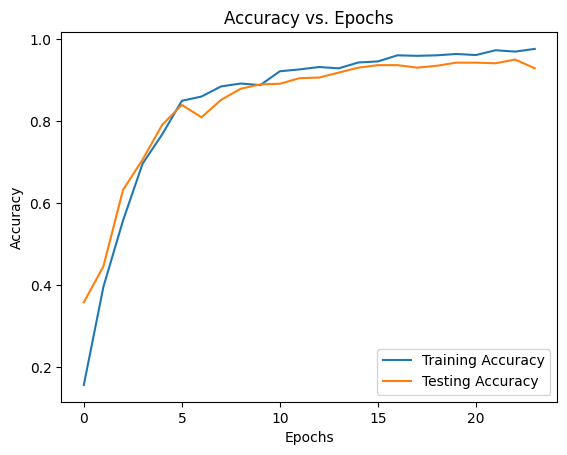

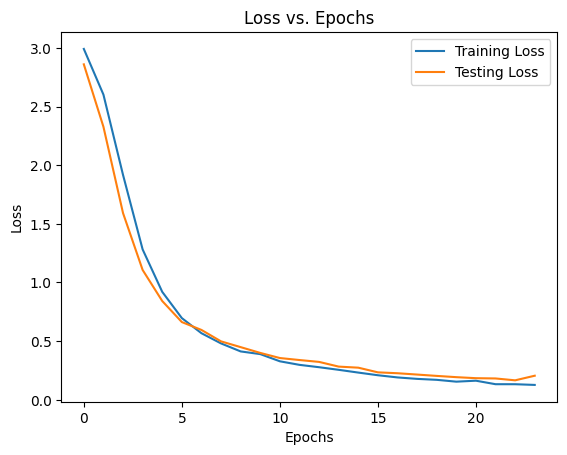

In [86]:
hist = crops_model(x_train, y_train, x_test, y_test)